In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
data = pd.read_csv('ICPSR_31401/DS0001/31401-0001-Data.csv')

In [3]:
data = data.replace(' ', np.nan)


In [4]:
data = data.drop(data[(data.q601a01 == 8) | (data.q601a01 == 9) | 
                                                    (data.q601b01 == 8) | (data.q601b01 == 9) |
                                                    (data.q601c01 == 8) | (data.q601c01 == 9) |
                                                    (data.q601d01 == 8) | (data.q601d01 == 9) |
                                                    (data.q601e01 == 8) | (data.q601e01 == 9) |
                                                    (data.q601f01 == 8) | (data.q601f01 == 9) |
                                                    (data.q601g01 == 8) | (data.q601g01 == 9) ].index)

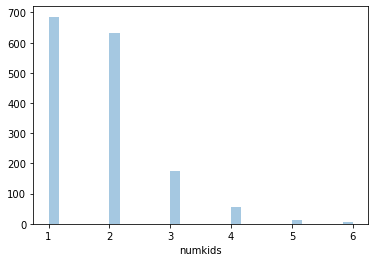

In [5]:
sb.distplot(data['numkids'],hist = True, kde=False, rug=False)


In [6]:
data_with_bp = data[['unique_id','numkids','q601a01','q601b01','q601c01','q601d01','q601e01', 'q601f01','q601g01']]

In [7]:
data_with_bp

,unique_id,numkids,q601a01,q601b01,q601c01,q601d01,q601e01,q601f01,q601g01
0,101,1,0,0,0,0,0,0,0
1,102,3,0,0,0,0,0,0,0
2,103,1,0,0,0,0,0,0,0
3,104,2,0,0,0,0,0,0,0
4,105,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1570,1671,2,0,0,0,0,0,0,0
1571,1672,1,0,0,0,0,0,0,0
1572,1673,1,0,0,0,0,0,0,0
1573,1674,1,0,0,0,0,0,0,0


In [8]:
data_with_bp_1 = data_with_bp.query('q601a01 > 0 or q601b01 > 0 or q601c01 > 0 or q601d01 > 0 or q601e01 > 0 or q601f01 > 0 or q601g01 > 0')

print(data_with_bp_1.shape)


(285, 9)


In [9]:
print('Out of', data.shape[0], 'families,',data_with_bp_1.shape[0], 'families had at least one kid with some behavior problem')

Out of 1566 families, 285 families had at least one kid with some behavior problem


In [10]:
# data_with_bp_more_1 = data_with_bp_1.query('numkids > 1')
# data_with_bp_more_1.shape

In [11]:
data_more_1kid_all = data[data.index.isin(data_with_bp_1.index)]

In [12]:
data_more_1kid_all.shape

(285, 457)

In [13]:
dataADpre = data.loc[data['q601b01'] > 0]
dataADpre[['unique_id','q601b01','q601b02','q601b03','q601b04','q601b05','q601b06']]

,unique_id,q601b01,q601b02,q601b03,q601b04,q601b05,q601b06
18,119,3,NaN,NaN,NaN,NaN,NaN
29,130,1,NaN,NaN,NaN,NaN,NaN
68,169,2,NaN,NaN,NaN,NaN,NaN
70,171,1,NaN,NaN,NaN,NaN,NaN
84,185,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1386,1487,1,NaN,NaN,NaN,NaN,NaN
1451,1552,4,NaN,NaN,NaN,NaN,NaN
1466,1567,1,NaN,NaN,NaN,NaN,NaN
1531,1632,1,NaN,NaN,NaN,NaN,NaN


In [14]:
dataADpre = data.loc[data['q601c01'] > 0]
dataADpre[['unique_id','q601c01','q601c02','q601c03','q601c04','q601c05','q601c06']]

,unique_id,q601c01,q601c02,q601c03,q601c04,q601c05,q601c06
95,196,1,NaN,NaN,NaN,NaN,NaN
112,213,1,NaN,NaN,NaN,NaN,NaN
150,251,5,NaN,NaN,NaN,NaN,NaN
178,279,2,NaN,NaN,NaN,NaN,NaN
194,295,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1450,1551,2,NaN,NaN,NaN,NaN,NaN
1462,1563,1,NaN,NaN,NaN,NaN,NaN
1466,1567,1,NaN,NaN,NaN,NaN,NaN
1552,1653,1,NaN,NaN,NaN,NaN,NaN


In [15]:
data = data.reindex(data.index.repeat(data.numkids))
data = data.reset_index(drop=True)
data['Child#'] = 0

n = 0
while n < data.shape[0]:
    for i in range(1, (list(data.loc[n, ['numkids']])[0]) + 1):
        data.loc[n + i - 1, ['Child#']] = i
    n += i

data.shape

(2792, 458)

In [16]:
data['has_problem'] = 0

for col in ['q601a01','q601a02','q601a03','q601a04','q601a05','q601a06']:
    for n in range(data.shape[0]):
        data[col] = pd.to_numeric(data[col])

        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            data.loc[n, ['has_problem']] = 1
            
            
    
data.loc[data['q601a01'] == 7, 'has_problem'] = 1

data['type'] = np.nan
data.loc[data['has_problem'] == 1, 'type'] = 'ADHD'



data.shape

(2792, 460)

In [17]:
data119 = data.loc[data['unique_id'] == 119]

data119[['unique_id','q601a01','q601a02','q601a03','q601a04','q601a05','q601a06','Child#','has_problem','type']]

,unique_id,q601a01,q601a02,q601a03,q601a04,q601a05,q601a06,Child#,has_problem,type
32,119,3,4.0,NaN,NaN,NaN,NaN,1,0,NaN
33,119,3,4.0,NaN,NaN,NaN,NaN,2,0,NaN
34,119,3,4.0,NaN,NaN,NaN,NaN,3,1,ADHD
35,119,3,4.0,NaN,NaN,NaN,NaN,4,1,ADHD


In [18]:
data_org = data.copy()
m = data_org.shape[0] + 1
lenght = data_org.shape[0]


for col in ['q601b01','q601b02','q601b03','q601b04','q601b05','q601b06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'AD'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'AD'
                

                
for n in range(lenght):
    if list(data.loc[n, ['q601b01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'AD'
            m +=  1

            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'AD'
    


data.shape

(2836, 460)

In [19]:
data119 = data.loc[data['unique_id'] == 119]

data119[['unique_id','q601b01','q601b02','q601b03','q601b04','q601b05','q601b06','Child#','has_problem','type']]

,unique_id,q601b01,q601b02,q601b03,q601b04,q601b05,q601b06,Child#,has_problem,type
32,119,3,NaN,NaN,NaN,NaN,NaN,1,0,NaN
33,119,3,NaN,NaN,NaN,NaN,NaN,2,0,NaN
34,119,3,NaN,NaN,NaN,NaN,NaN,3,1,ADHD
35,119,3,NaN,NaN,NaN,NaN,NaN,4,1,ADHD
2793,119,3,NaN,NaN,NaN,NaN,NaN,3,1,AD


In [20]:
m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q601c01','q601c02','q601c03','q601c04','q601c05','q601c06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])

        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Aggresive'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Aggresive'


                
for n in range(lenght):
    if list(data.loc[n, ['q601c01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Aggresive'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Aggresive'
    

data.shape

(2880, 460)

In [21]:
data119 = data.loc[data['unique_id'] == 119]

data119[['unique_id','q601c01','q601c02','q601c03','q601c04','q601c05','q601c06','Child#','has_problem','type']]

,unique_id,q601c01,q601c02,q601c03,q601c04,q601c05,q601c06,Child#,has_problem,type
32,119,0,NaN,NaN,NaN,NaN,NaN,1,0,NaN
33,119,0,NaN,NaN,NaN,NaN,NaN,2,0,NaN
34,119,0,NaN,NaN,NaN,NaN,NaN,3,1,ADHD
35,119,0,NaN,NaN,NaN,NaN,NaN,4,1,ADHD
2793,119,0,NaN,NaN,NaN,NaN,NaN,3,1,AD


In [22]:
m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q601d01','q601d02','q601d03','q601d04','q601d05','q601d06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])

        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'PDD'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'PDD'


                
for n in range(lenght):
    if list(data.loc[n, ['q601d01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'PDD'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'PDD'
    


data.shape

(2913, 460)

In [23]:
data119 = data.loc[data['unique_id'] == 119]

data119[['unique_id','q601d01','q601d02','q601d03','q601d04','q601d05','q601d06','Child#','has_problem','type']]

,unique_id,q601d01,q601d02,q601d03,q601d04,q601d05,q601d06,Child#,has_problem,type
32,119,3,NaN,NaN,NaN,NaN,NaN,1,0,NaN
33,119,3,NaN,NaN,NaN,NaN,NaN,2,0,NaN
34,119,3,NaN,NaN,NaN,NaN,NaN,3,1,ADHD
35,119,3,NaN,NaN,NaN,NaN,NaN,4,1,ADHD
2793,119,3,NaN,NaN,NaN,NaN,NaN,3,1,AD
2881,119,3,NaN,NaN,NaN,NaN,NaN,3,1,PDD


In [24]:
m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q601e01','q601e02','q601e03','q601e04','q601e05','q601e06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]: 
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'AS'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'AS'


                
for n in range(lenght):
    if list(data.loc[n, ['q601e01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'AS'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'AS'



data.shape

(2946, 460)

In [25]:
data119 = data.loc[data['unique_id'] == 119]

data119[['unique_id','q601e01','q601e02','q601e03','q601e04','q601e05','q601e06','Child#','has_problem','type']]

,unique_id,q601e01,q601e02,q601e03,q601e04,q601e05,q601e06,Child#,has_problem,type
32,119,3,NaN,NaN,NaN,NaN,NaN,1,0,NaN
33,119,3,NaN,NaN,NaN,NaN,NaN,2,0,NaN
34,119,3,NaN,NaN,NaN,NaN,NaN,3,1,ADHD
35,119,3,NaN,NaN,NaN,NaN,NaN,4,1,ADHD
2793,119,3,NaN,NaN,NaN,NaN,NaN,3,1,AD
2881,119,3,NaN,NaN,NaN,NaN,NaN,3,1,PDD
2914,119,3,NaN,NaN,NaN,NaN,NaN,3,1,AS


In [26]:
m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q601f01','q601f02','q601f03','q601f04','q601f05','q601f06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'ASD'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'ASD'


                
for n in range(lenght):
    if list(data.loc[n, ['q601f01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'ASD'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'ASD'
    

data.shape

(3019, 460)

In [27]:
data119 = data.loc[data['unique_id'] == 119]

data119[['unique_id','q601f01','q601f02','q601f03','q601f04','q601f05','q601f06','Child#','has_problem','type']]

,unique_id,q601f01,q601f02,q601f03,q601f04,q601f05,q601f06,Child#,has_problem,type
32,119,3,NaN,NaN,NaN,NaN,NaN,1,0,NaN
33,119,3,NaN,NaN,NaN,NaN,NaN,2,0,NaN
34,119,3,NaN,NaN,NaN,NaN,NaN,3,1,ADHD
35,119,3,NaN,NaN,NaN,NaN,NaN,4,1,ADHD
2793,119,3,NaN,NaN,NaN,NaN,NaN,3,1,AD
2881,119,3,NaN,NaN,NaN,NaN,NaN,3,1,PDD
2914,119,3,NaN,NaN,NaN,NaN,NaN,3,1,AS
2947,119,3,NaN,NaN,NaN,NaN,NaN,3,1,ASD


In [28]:
m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q601g01','q601g02','q601g03','q601g04','q601g05','q601g06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Behavior'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Behavior'


                
for n in range(lenght):
    if list(data.loc[n, ['q601g01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Behavior'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Behavior'
    

data.shape

(3119, 460)

In [29]:
data119 = data.loc[data['unique_id'] == 119]

data119[['unique_id','q601g01','q601g02','q601g03','q601g04','q601g05','q601g06','Child#','has_problem','type']]

,unique_id,q601g01,q601g02,q601g03,q601g04,q601g05,q601g06,Child#,has_problem,type
32,119,3,NaN,NaN,NaN,NaN,NaN,1,0,NaN
33,119,3,NaN,NaN,NaN,NaN,NaN,2,0,NaN
34,119,3,NaN,NaN,NaN,NaN,NaN,3,1,ADHD
35,119,3,NaN,NaN,NaN,NaN,NaN,4,1,ADHD
2793,119,3,NaN,NaN,NaN,NaN,NaN,3,1,AD
2881,119,3,NaN,NaN,NaN,NaN,NaN,3,1,PDD
2914,119,3,NaN,NaN,NaN,NaN,NaN,3,1,AS
2947,119,3,NaN,NaN,NaN,NaN,NaN,3,1,ASD
3021,119,3,NaN,NaN,NaN,NaN,NaN,3,1,Behavior


In [30]:
m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q601h01','q601h02','q601h03','q601h04','q601h05','q601h06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Asthma'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Asthma'


                
for n in range(lenght):
    if list(data.loc[n, ['q601h01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Asthma'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Asthma'
    
data.shape

(3182, 460)

In [31]:
data119 = data.loc[data['unique_id'] == 119]

data119[['unique_id','q601h01','q601h02','q601h03','q601h04','q601h05','q601h06','Child#','has_problem','type']]

,unique_id,q601h01,q601h02,q601h03,q601h04,q601h05,q601h06,Child#,has_problem,type
32,119,0,NaN,NaN,NaN,NaN,NaN,1,0,NaN
33,119,0,NaN,NaN,NaN,NaN,NaN,2,0,NaN
34,119,0,NaN,NaN,NaN,NaN,NaN,3,1,ADHD
35,119,0,NaN,NaN,NaN,NaN,NaN,4,1,ADHD
2793,119,0,NaN,NaN,NaN,NaN,NaN,3,1,AD
2881,119,0,NaN,NaN,NaN,NaN,NaN,3,1,PDD
2914,119,0,NaN,NaN,NaN,NaN,NaN,3,1,AS
2947,119,0,NaN,NaN,NaN,NaN,NaN,3,1,ASD
3021,119,0,NaN,NaN,NaN,NaN,NaN,3,1,Behavior


In [32]:
m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q601i01','q601i02','q601i03','q601i04','q601i05','q601i06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Heart'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Heart'


                
for n in range(lenght):
    if list(data.loc[n, ['q601i01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Heart'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Heart'
    

data.shape

(3197, 460)

In [33]:
data119 = data.loc[data['unique_id'] == 119]

data119[['unique_id','q601i01','q601i02','q601i03','q601i04','q601i05','q601i06','Child#','has_problem','type']]

,unique_id,q601i01,q601i02,q601i03,q601i04,q601i05,q601i06,Child#,has_problem,type
32,119,0,NaN,NaN,NaN,NaN,NaN,1,0,NaN
33,119,0,NaN,NaN,NaN,NaN,NaN,2,0,NaN
34,119,0,NaN,NaN,NaN,NaN,NaN,3,1,ADHD
35,119,0,NaN,NaN,NaN,NaN,NaN,4,1,ADHD
2793,119,0,NaN,NaN,NaN,NaN,NaN,3,1,AD
2881,119,0,NaN,NaN,NaN,NaN,NaN,3,1,PDD
2914,119,0,NaN,NaN,NaN,NaN,NaN,3,1,AS
2947,119,0,NaN,NaN,NaN,NaN,NaN,3,1,ASD
3021,119,0,NaN,NaN,NaN,NaN,NaN,3,1,Behavior


In [34]:
m = data.shape[0] + 1
lenght = data_org.shape[0]


for col in ['q601j01','q601j02','q601j03','q601j04','q601j05','q601j06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Chornic condition'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Chornic condition'


                
for n in range(lenght):
    if list(data.loc[n, ['q601j01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Chornic condition'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Chornic condition'
    

data.shape

(3285, 460)

In [35]:
data119 = data.loc[data['unique_id'] == 119]

data119[['unique_id','q601j01','q601j02','q601j03','q601j04','q601j05','q601j06','Child#','has_problem','type']]

,unique_id,q601j01,q601j02,q601j03,q601j04,q601j05,q601j06,Child#,has_problem,type
32,119,0,NaN,NaN,NaN,NaN,NaN,1,0,NaN
33,119,0,NaN,NaN,NaN,NaN,NaN,2,0,NaN
34,119,0,NaN,NaN,NaN,NaN,NaN,3,1,ADHD
35,119,0,NaN,NaN,NaN,NaN,NaN,4,1,ADHD
2793,119,0,NaN,NaN,NaN,NaN,NaN,3,1,AD
2881,119,0,NaN,NaN,NaN,NaN,NaN,3,1,PDD
2914,119,0,NaN,NaN,NaN,NaN,NaN,3,1,AS
2947,119,0,NaN,NaN,NaN,NaN,NaN,3,1,ASD
3021,119,0,NaN,NaN,NaN,NaN,NaN,3,1,Behavior


In [36]:
m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q60201','q60202','q60203','q60204','q60205','q60206']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Special needs'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Special needs'


                
for n in range(lenght):
    if list(data.loc[n, ['q60201']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Special needs'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Special needs'
    

data.shape

(3448, 460)

In [37]:
m = data.shape[0] + 1
lenght = data_org.shape[0]
for col in ['q60301','q60302','q60303','q60304','q60305','q60306']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Attention problems'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Attention problems'


                
for n in range(lenght):
    if list(data.loc[n, ['q60301']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Attention problems'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Attention problems'
    
data.shape

(3484, 460)

In [38]:
m = data.shape[0] + 1
lenght = data_org.shape[0]
for col in ['q60401','q60402','q60403','q60404','q60405','q60406']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'More medical'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'More medical'


                
for n in range(lenght):
    if list(data.loc[n, ['q60401']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'More medical'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'More medical'
    

data.shape

(3729, 460)

In [39]:
m = data.shape[0] + 1
lenght = data_org.shape[0]
for col in ['q60501','q60502','q60503','q60504','q60505','q60506']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Limited ability'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Limited ability'


                
for n in range(lenght):
    if list(data.loc[n, ['q60501']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Limited ability'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Limited ability'
    

data.shape

(3870, 460)

In [40]:
m = data.shape[0] + 1
lenght = data_org.shape[0]
for col in ['q60601','q60602','q60603','q60604','q60605','q60606']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'PT/OT'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'PT/OT'


                
for n in range(lenght):
    if list(data.loc[n, ['q60601']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'PT/OT'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'PT/OT'
    

data.shape

(4132, 460)

In [41]:
m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q60701','q60702','q60703','q60704','q60705','q60706']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'IEP'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'IEP'


                
for n in range(lenght):
    if list(data.loc[n, ['q60701']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'IEP'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'IEP'
    


data.shape

(4294, 460)

In [42]:
m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q60801','q60802','q60803','q60804','q60805','q60806']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'IFSP'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'IFSP'


                
for n in range(lenght):
    if list(data.loc[n, ['q60801']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'IFSP'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'IFSP'
    

data.shape

(4302, 460)

In [43]:
# data = data.sort_values(['unique_id'])
# data = data.reset_index(drop=True)

data.drop(['q601a01','q601a02','q601a03','q601a04','q601a05','q601a06'], axis=1, inplace=True)
data.drop(['q601b01','q601b02','q601b03','q601b04','q601b05','q601b06'], axis=1, inplace=True)
data.drop(['q601c01','q601c02','q601c03','q601c04','q601c05','q601c06'], axis=1, inplace=True)
data.drop(['q601d01','q601d02','q601d03','q601d04','q601d05','q601d06'], axis=1, inplace=True)
data.drop(['q601e01','q601e02','q601e03','q601e04','q601e05','q601e06'], axis=1, inplace=True)
data.drop(['q601f01','q601f02','q601f03','q601f04','q601f05','q601f06'], axis=1, inplace=True)
data.drop(['q601g01','q601g02','q601g03','q601g04','q601g05','q601g06'], axis=1, inplace=True)
data.drop(['q601h01','q601h02','q601h03','q601h04','q601h05','q601h06'], axis=1, inplace=True)
data.drop(['q601i01','q601i02','q601i03','q601i04','q601i05','q601i06'], axis=1, inplace=True)
data.drop(['q601j01','q601j02','q601j03','q601j04','q601j05','q601j06'], axis=1, inplace=True)
data.drop(['q60201','q60202','q60203','q60204','q60205','q60206'], axis=1, inplace=True)

data.drop(['q60801','q60802','q60803','q60804','q60805','q60806'], axis=1, inplace=True)

data.drop(['q60701','q60702','q60703','q60704','q60705','q60706'], axis=1, inplace=True)

data.drop(['q60601','q60602','q60603','q60604','q60605','q60606'], axis=1, inplace=True)

data.drop(['q60501','q60502','q60503','q60504','q60505','q60506'], axis=1, inplace=True)

data.drop(['q60401','q60402','q60403','q60404','q60405','q60406'], axis=1, inplace=True)

data.drop(['q60301','q60302','q60303','q60304','q60305','q60306'], axis=1, inplace=True)


data.shape



(4302, 358)

In [44]:
list_drop = ['year','month','day','sam_type','p3','q100', 'q100xlld','agecnt1','agecnt2','agecnt3','agecnt4',
                'q101a2a', 'q101b2a','q101c2a','q101d2a', 'q101e2a','q101f2a','q104', 'q609','q702_a01', 'q702_a02', 'q702_a03',
               'q702_a04', 'q702_a05','q702_a06','q800a','q800aage','q800b','q801','p4','q905'] + list(data.loc[:, 'WEIGHT_GEN_POP':'WEIGHT_AUT_ALL'].columns)+list(data.loc[:, 'q802a':'q806o'].columns)+ list(data.loc[:, 'q906':'q907f'].columns)

df = data.drop(list_drop, axis=1)


In [45]:
df.loc[df['strata'] == '11','strata'] = 'NE low'
df.loc[df['strata'] == '12','strata'] = 'NE high'
df.loc[df['strata'] == '21','strata'] = 'MW low'
df.loc[df['strata'] == '22','strata'] = 'MW high'
df.loc[df['strata'] == '31','strata'] = 'S low'
df.loc[df['strata'] == '32','strata'] = 'S high'
df.loc[df['strata'] == '41','strata'] = 'W low'
df.loc[df['strata'] == '42','strata'] = 'W high'
df.loc[df['strata'] == '50','strata'] = 'Autistic child'







In [46]:
df = df.reset_index(drop=True)

df['child_age'] = 0
df['sex'] = np.nan
df['hrs/wk in chld care'] = 0

length = df.shape[0]
child = 1

for col in ['q101a1','q101b1','q101c1','q101d1','q101e1','q101f1']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, ['Child#']])[0] == child:
            df.loc[n, ['child_age']] = list(df.loc[n, [col]])[0]
            
    child += 1
            
child = 1
for col in ['q101a2','q101b2','q101c2','q101d2','q101e2','q101f2']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, ['Child#']])[0] == child:
            df.loc[n, ['sex']] = list(df.loc[n, [col]])[0]
            
    child += 1    
    
    
df.loc[df['sex'] == 1,'sex'] = 'male'
df.loc[df['sex'] == 2,'sex'] = 'female'   
df.loc[df['sex'] == 3,'sex'] = np.nan   



child = 1

for col in ['q303a','q303b','q303c','q303d','q303e','q303f']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, ['Child#']])[0] == child:
            df.loc[n, ['hrs/wk in chld care']] = list(df.loc[n, [col]])[0]
            
    child += 1

In [47]:
df.drop(['q303a','q303b','q303c','q303d','q303e','q303f','q101a1','q101b1','q101c1','q101d1','q101e1','q101f1','q101a2','q101b2','q101c2','q101d2','q101e2','q101f2'], axis=1, inplace=True)


In [48]:


df.rename(columns={"q105": "two_parent_house", "q200": "regular_activity"}, inplace=True)

In [49]:
df.loc[df['two_parent_house'] == 1,'two_parent_house'] = 'yes'
df.loc[df['two_parent_house'] == 2,'two_parent_house'] = 'no' 

df.loc[df['regular_activity'] == 1,'regular_activity'] = 'yes'
df.loc[df['regular_activity'] == 2,'regular_activity'] = 'no' 

In [50]:
df = df.reset_index(drop=True)


In [51]:
df['child_care'] = np.nan

m = df.shape[0] + 1
length = data_org.shape[0]

for col in ['q301a01','q301a02','q301a03','q301a04','q301a05','q301a06']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
            if list(df.loc[n, ['child_care']])[0] != 'NaN':
                df.loc[m] = list(df.loc[n])
                df.loc[m, ['child_care']] = 'parent_not_in_house'
                m += 1
                
            else: 
                df.loc[n, ['child_care']] = 'parent_not_in_house'

                

                
for n in range(length):
    if list(df.loc[n, ['q301a01']])[0] == 7:
        if list(df.loc[n, ['child_care']])[0] != 'NaN': 
            df.loc[m] = list(df.loc[n])
            df.loc[m, ['child_care']] = 'parent_not_in_house'

            m +=  1

            
        else: 
            df.loc[n, ['child_care']] = 'parent_not_in_house'


df.drop(['q301a01','q301a02','q301a03','q301a04','q301a05','q301a06'], axis=1, inplace=True)

    


df.shape

(4715, 235)

In [52]:
df

,unique_id,age,strata,s1,s3,numkids,two_parent_house,regular_activity,q201,q202,...,DEMO_RACE_AMERICAN_INDIAN,DEMO_RACE_NATIVE_HAWAIIAN,DEMO_RACE_OTHER,Child#,has_problem,type,child_age,sex,hrs/wk in chld care,child_care
0,101,40,W high,1,NaN,1,yes,yes,2,2,...,NaN,NaN,NaN,1,0,NaN,1.0,male,35.0,NaN
1,102,29,MW high,1,NaN,3,yes,yes,2,2,...,NaN,NaN,NaN,1,0,NaN,6.0,male,25.0,NaN
2,102,29,MW high,1,NaN,3,yes,yes,2,2,...,NaN,NaN,NaN,2,0,NaN,7.0,female,0.0,NaN
3,102,29,MW high,1,NaN,3,yes,yes,2,2,...,NaN,NaN,NaN,3,0,NaN,13.0,female,0.0,NaN
4,103,43,S high,1,NaN,1,yes,yes,2,2,...,NaN,NaN,NaN,1,0,NaN,2.0,male,32.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711,1644,49,W high,1,NaN,2,yes,yes,2,2,...,NaN,NaN,1,2,1,Asthma,6.0,male,6.0,parent_not_in_house
4712,1649,49,W low,1,NaN,2,no,yes,4,2,...,NaN,NaN,NaN,1,0,NaN,7.0,male,0.0,parent_not_in_house
4713,1649,49,W low,1,NaN,2,no,yes,4,2,...,NaN,NaN,NaN,2,0,NaN,10.0,female,0.0,parent_not_in_house
4714,1665,41,W high,1,NaN,2,yes,yes,3,2,...,NaN,NaN,NaN,1,1,PT/OT,9.0,female,8.0,parent_not_in_house


In [53]:
m = df.shape[0] + 1
length = data_org.shape[0]

for col in ['q301b01','q301b02','q301b03','q301b04','q301b05','q301b06']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
            if list(df.loc[n, ['child_care']])[0] != 'NaN':
                df.loc[m] = list(df.loc[n])
                df.loc[m, ['child_care']] = 'nanny'
                m += 1
                
            else: 
                df.loc[n, ['child_care']] = 'nanny'

                

                
for n in range(length):
    if list(df.loc[n, ['q301b01']])[0] == 7:
        if list(df.loc[n, ['child_care']])[0] != 'NaN': 
            df.loc[m] = list(df.loc[n])
            df.loc[m, ['child_care']] = 'nanny'

            m +=  1

            
        else: 
            df.loc[n, ['child_care']] = 'nanny'


df.drop(['q301b01','q301b02','q301b03','q301b04','q301b05','q301b06'], axis=1, inplace=True)

    


df.shape

(5327, 229)

In [54]:
m = df.shape[0] + 1
length = data_org.shape[0]

for col in ['q301c01','q301c02','q301c03','q301c04','q301c05','q301c06']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
            if list(df.loc[n, ['child_care']])[0] != 'NaN':
                df.loc[m] = list(df.loc[n])
                df.loc[m, ['child_care']] = 'attending child care'
                m += 1
                
            else: 
                df.loc[n, ['child_care']] = 'attending child care'

                

                
for n in range(length):
    if list(df.loc[n, ['q301c01']])[0] == 7:
        if list(df.loc[n, ['child_care']])[0] != 'NaN': 
            df.loc[m] = list(df.loc[n])
            df.loc[m, ['child_care']] = 'attending child care'

            m +=  1

            
        else: 
            df.loc[n, ['child_care']] = 'attending child care'


    
df.drop(['q301c01','q301c02','q301c03','q301c04','q301c05','q301c06'], axis=1, inplace=True)



df.shape

(5496, 223)

In [55]:
m = df.shape[0] + 1
length = data_org.shape[0]

for col in ['q301d01','q301d02','q301d03','q301d04','q301d05','q301d06']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
            if list(df.loc[n, ['child_care']])[0] != 'NaN':
                df.loc[m] = list(df.loc[n])
                df.loc[m, ['child_care']] = 'family based child care'
                m += 1
                
            else: 
                df.loc[n, ['child_care']] = 'family based child care'

                

                
for n in range(length):
    if list(df.loc[n, ['q301d01']])[0] == 7:
        if list(df.loc[n, ['child_care']])[0] != 'NaN': 
            df.loc[m] = list(df.loc[n])
            df.loc[m, ['child_care']] = 'family based child care'

            m +=  1

            
        else: 
            df.loc[n, ['child_care']] = 'family based child care'


df.drop(['q301d01','q301d02','q301d03','q301d04','q301d05','q301d06'], axis=1, inplace=True)

    


df.shape

(5638, 217)

In [56]:
m = df.shape[0] + 1
length = data_org.shape[0]

for col in ['q301e01','q301e02','q301e03','q301e04','q301e05','q301e06']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
            if list(df.loc[n, ['child_care']])[0] != 'NaN':
                df.loc[m] = list(df.loc[n])
                df.loc[m, ['child_care']] = 'preschool'
                m += 1
                
            else: 
                df.loc[n, ['child_care']] = 'preschool'

                

                
for n in range(length):
    if list(df.loc[n, ['q301e01']])[0] == 7:
        if list(df.loc[n, ['child_care']])[0] != 'NaN': 
            df.loc[m] = list(df.loc[n])
            df.loc[m, ['child_care']] = 'preschool'

            m +=  1

            
        else: 
            df.loc[n, ['child_care']] = 'preschool'


df.drop(['q301e01','q301e02','q301e03','q301e04','q301e05','q301e06'], axis=1, inplace=True)

    


df.shape

(5869, 211)

In [57]:
m = df.shape[0] + 1
length = data_org.shape[0]

for col in ['q301f01','q301f02','q301f03','q301f04','q301f05','q301f06']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
            if list(df.loc[n, ['child_care']])[0] != 'NaN':
                df.loc[m] = list(df.loc[n])
                df.loc[m, ['child_care']] = 'head start program'
                m += 1
                
            else: 
                df.loc[n, ['child_care']] = 'head start program'

                

                
for n in range(length):
    if list(df.loc[n, ['q301f01']])[0] == 7:
        if list(df.loc[n, ['child_care']])[0] != 'NaN': 
            df.loc[m] = list(df.loc[n])
            df.loc[m, ['child_care']] = 'head start program'

            m +=  1

            
        else: 
            df.loc[n, ['child_care']] = 'head start program'


    
df.drop(['q301f01','q301f02','q301f03','q301f04','q301f05','q301f06'], axis=1, inplace=True)



df.shape

(5906, 205)

In [58]:
m = df.shape[0] + 1
length = data_org.shape[0]

for col in ['q301g01','q301g02','q301g03','q301g04','q301g05','q301g06']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
            if list(df.loc[n, ['child_care']])[0] != 'NaN':
                df.loc[m] = list(df.loc[n])
                df.loc[m, ['child_care']] = 'drop off activity'
                m += 1
                
            else: 
                df.loc[n, ['child_care']] = 'drop off activity'

                

                
for n in range(length):
    if list(df.loc[n, ['q301g01']])[0] == 7:
        if list(df.loc[n, ['child_care']])[0] != 'NaN': 
            df.loc[m] = list(df.loc[n])
            df.loc[m, ['child_care']] = 'drop off activity'

            m +=  1

            
        else: 
            df.loc[n, ['child_care']] = 'drop off activity'


df.drop(['q301g01','q301g02','q301g03','q301g04','q301g05','q301g06'], axis=1, inplace=True)

    


df.shape

(6077, 199)

In [59]:
m = df.shape[0] + 1
length = data_org.shape[0]

for col in ['q301h01','q301h02','q301h03','q301h04','q301h05','q301h06']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
            if list(df.loc[n, ['child_care']])[0] != 'NaN':
                df.loc[m] = list(df.loc[n])
                df.loc[m, ['child_care']] = 'before/ at school'
                m += 1
                
            else: 
                df.loc[n, ['child_care']] = 'before/ at school'

                

                
for n in range(length):
    if list(df.loc[n, ['q301h01']])[0] == 7:
        if list(df.loc[n, ['child_care']])[0] != 'NaN': 
            df.loc[m] = list(df.loc[n])
            df.loc[m, ['child_care']] = 'before/ at school'

            m +=  1

            
        else: 
            df.loc[n, ['child_care']] = 'before/ at school'


df.drop(['q301h01','q301h02','q301h03','q301h04','q301h05','q301h06'], axis=1, inplace=True)

    


df.shape

(6235, 193)

In [60]:
m = df.shape[0] + 1
length = data_org.shape[0]

for col in ['q301i01','q301i02','q301i03','q301i04','q301i05','q301i06']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
            if list(df.loc[n, ['child_care']])[0] != 'NaN':
                df.loc[m] = list(df.loc[n])
                df.loc[m, ['child_care']] = 'after/ at school'
                m += 1
                
            else: 
                df.loc[n, ['child_care']] = 'after/ at school'

                

                
for n in range(length):
    if list(df.loc[n, ['q301i01']])[0] == 7:
        if list(df.loc[n, ['child_care']])[0] != 'NaN': 
            df.loc[m] = list(df.loc[n])
            df.loc[m, ['child_care']] = 'after/ at school'

            m +=  1

            
        else: 
            df.loc[n, ['child_care']] = 'after/ at school'


df.drop(['q301i01','q301i02','q301i03','q301i04','q301i05','q301i06'], axis=1, inplace=True)

    


df.shape

(6697, 187)

In [61]:
m = df.shape[0] + 1
length = data_org.shape[0]

for col in ['q301j01','q301j02','q301j03','q301j04','q301j05','q301j06']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
            if list(df.loc[n, ['child_care']])[0] != 'NaN':
                df.loc[m] = list(df.loc[n])
                df.loc[m, ['child_care']] = 'after/ not at school'
                m += 1
                
            else: 
                df.loc[n, ['child_care']] = 'after/ not at school'

                

                
for n in range(length):
    if list(df.loc[n, ['q301j01']])[0] == 7:
        if list(df.loc[n, ['child_care']])[0] != 'NaN': 
            df.loc[m] = list(df.loc[n])
            df.loc[m, ['child_care']] = 'after/ not at school'

            m +=  1

            
        else: 
            df.loc[n, ['child_care']] = 'after/ not at school'


    
df.drop(['q301j01','q301j02','q301j03','q301j04','q301j05','q301j06'], axis=1, inplace=True)



df.shape

(7269, 181)

In [62]:
m = df.shape[0] + 1
length = data_org.shape[0]

for col in ['q301k01','q301k02','q301k03','q301k04','q301k05','q301k06']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
            if list(df.loc[n, ['child_care']])[0] != 'NaN':
                df.loc[m] = list(df.loc[n])
                df.loc[m, ['child_care']] = 'other'
                m += 1
                
            else: 
                df.loc[n, ['child_care']] = 'other'

                

                
for n in range(length):
    if list(df.loc[n, ['q301k01']])[0] == 7:
        if list(df.loc[n, ['child_care']])[0] != 'NaN': 
            df.loc[m] = list(df.loc[n])
            df.loc[m, ['child_care']] = 'other'

            m +=  1

            
        else: 
            df.loc[n, ['child_care']] = 'other'


df.drop(['q301k01','q301k02','q301k03','q301k04','q301k05','q301k06'], axis=1, inplace=True)

    


df.shape

(7749, 175)

In [63]:
df['child_activity'] = np.nan

m = df.shape[0] + 1
length = data_org.shape[0]

for col in ['q302a01','q302a02','q302a03','q302a04','q302a05','q302a06']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
            if list(df.loc[n, ['child_activity']])[0] != 'NaN':
                df.loc[m] = list(df.loc[n])
                df.loc[m, ['child_activity']] = 'music'
                m += 1
                
            else: 
                df.loc[n, ['child_activity']] = 'music'

                

                
for n in range(length):
    if list(df.loc[n, ['q302a01']])[0] == 7:
        if list(df.loc[n, ['child_activity']])[0] != 'NaN': 
            df.loc[m] = list(df.loc[n])
            df.loc[m, ['child_activity']] = 'music'

            m +=  1

            
        else: 
            df.loc[n, ['child_activity']] = 'music'


df.drop(['q302a01','q302a02','q302a03','q302a04','q302a05','q302a06'], axis=1, inplace=True)

    


df.shape

(8250, 170)

In [64]:
m = df.shape[0] + 1
length = data_org.shape[0]

for col in ['q302b01','q302b02','q302b03','q302b04','q302b05','q302b06']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
            if list(df.loc[n, ['child_activity']])[0] != 'NaN':
                df.loc[m] = list(df.loc[n])
                df.loc[m, ['child_activity']] = 'dance'
                m += 1
                
            else: 
                df.loc[n, ['child_activity']] = 'dance'

                

                
for n in range(length):
    if list(df.loc[n, ['q302b01']])[0] == 7:
        if list(df.loc[n, ['child_activity']])[0] != 'NaN': 
            df.loc[m] = list(df.loc[n])
            df.loc[m, ['child_activity']] = 'dance'

            m +=  1

            
        else: 
            df.loc[n, ['child_activity']] = 'dance'


    
df.drop(['q302b01','q302b02','q302b03','q302b04','q302b05','q302b06'], axis=1, inplace=True)



df.shape

(8495, 164)

In [65]:
m = df.shape[0] + 1
length = data_org.shape[0]

for col in ['q302c01','q302c02','q302c03','q302c04','q302c05','q302c06']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
            if list(df.loc[n, ['child_activity']])[0] != 'NaN':
                df.loc[m] = list(df.loc[n])
                df.loc[m, ['child_activity']] = 'art'
                m += 1
                
            else: 
                df.loc[n, ['child_activity']] = 'art'

                

                
for n in range(length):
    if list(df.loc[n, ['q302c01']])[0] == 7:
        if list(df.loc[n, ['child_activity']])[0] != 'NaN': 
            df.loc[m] = list(df.loc[n])
            df.loc[m, ['child_activity']] = 'art'

            m +=  1

            
        else: 
            df.loc[n, ['child_activity']] = 'art'


df.drop(['q302c01','q302c02','q302c03','q302c04','q302c05','q302c06'], axis=1, inplace=True)

    


df.shape

(8863, 158)

In [66]:
m = df.shape[0] + 1
length = data_org.shape[0]

for col in ['q302d01','q302d02','q302d03','q302d04','q302d05','q302d06']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
            if list(df.loc[n, ['child_activity']])[0] != 'NaN':
                df.loc[m] = list(df.loc[n])
                df.loc[m, ['child_activity']] = 'sport'
                m += 1
                
            else: 
                df.loc[n, ['child_activity']] = 'sport'

                

                
for n in range(length):
    if list(df.loc[n, ['q302d01']])[0] == 7:
        if list(df.loc[n, ['child_activity']])[0] != 'NaN': 
            df.loc[m] = list(df.loc[n])
            df.loc[m, ['child_activity']] = 'sport'

            m +=  1

            
        else: 
            df.loc[n, ['child_activity']] = 'sport'


df.drop(['q302d01','q302d02','q302d03','q302d04','q302d05','q302d06'], axis=1, inplace=True)

    


df.shape

(9687, 152)

In [67]:
m = df.shape[0] + 1
length = data_org.shape[0]

for col in ['q302e01','q302e02','q302e03','q302e04','q302e05','q302e06']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
            if list(df.loc[n, ['child_activity']])[0] != 'NaN':
                df.loc[m] = list(df.loc[n])
                df.loc[m, ['child_activity']] = 'tutoring'
                m += 1
                
            else: 
                df.loc[n, ['child_activity']] = 'tutoring'

                

                
for n in range(length):
    if list(df.loc[n, ['q302e01']])[0] == 7:
        if list(df.loc[n, ['child_activity']])[0] != 'NaN': 
            df.loc[m] = list(df.loc[n])
            df.loc[m, ['child_activity']] = 'tutoring'

            m +=  1

            
        else: 
            df.loc[n, ['child_activity']] = 'tutoring'


df.drop(['q302e01','q302e02','q302e03','q302e04','q302e05','q302e06'], axis=1, inplace=True)

    


df.shape

(9823, 146)

In [68]:
m = df.shape[0] + 1
length = data_org.shape[0]

for col in ['q302f01','q302f02','q302f03','q302f04','q302f05','q302f06']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
            if list(df.loc[n, ['child_activity']])[0] != 'NaN':
                df.loc[m] = list(df.loc[n])
                df.loc[m, ['child_activity']] = 'trains_behavios'
                m += 1
                
            else: 
                df.loc[n, ['child_activity']] = 'trains_behavios'

                

                
for n in range(length):
    if list(df.loc[n, ['q302f01']])[0] == 7:
        if list(df.loc[n, ['child_activity']])[0] != 'NaN': 
            df.loc[m] = list(df.loc[n])
            df.loc[m, ['child_activity']] = 'trains_behavios'

            m +=  1

            
        else: 
            df.loc[n, ['child_activity']] = 'trains_behavios'


    
df.drop(['q302f01','q302f02','q302f03','q302f04','q302f05','q302f06'], axis=1, inplace=True)



df.shape

(9985, 140)

In [69]:
m = df.shape[0] + 1
length = data_org.shape[0]

for col in ['q302g01','q302g02','q302g03','q302g04','q302g05','q302g06']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
            if list(df.loc[n, ['child_activity']])[0] != 'NaN':
                df.loc[m] = list(df.loc[n])
                df.loc[m, ['child_activity']] = 'religious'
                m += 1
                
            else: 
                df.loc[n, ['child_activity']] = 'religious'

                

                
for n in range(length):
    if list(df.loc[n, ['q302g01']])[0] == 7:
        if list(df.loc[n, ['child_activity']])[0] != 'NaN': 
            df.loc[m] = list(df.loc[n])
            df.loc[m, ['child_activity']] = 'religious'

            m +=  1

            
        else: 
            df.loc[n, ['child_activity']] = 'religious'


    
df.drop(['q302g01','q302g02','q302g03','q302g04','q302g05','q302g06'], axis=1, inplace=True)



df.shape

(10663, 134)

In [70]:
m = df.shape[0] + 1
length = data_org.shape[0]

for col in ['q302h01','q302h02','q302h03','q302h04','q302h05','q302h06']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
            if list(df.loc[n, ['child_activity']])[0] != 'NaN':
                df.loc[m] = list(df.loc[n])
                df.loc[m, ['child_activity']] = 'book'
                m += 1
                
            else: 
                df.loc[n, ['child_activity']] = 'book'

                

                
for n in range(length):
    if list(df.loc[n, ['q302h01']])[0] == 7:
        if list(df.loc[n, ['child_activity']])[0] != 'NaN': 
            df.loc[m] = list(df.loc[n])
            df.loc[m, ['child_activity']] = 'book'

            m +=  1

            
        else: 
            df.loc[n, ['child_activity']] = 'book'


    
df.drop(['q302h01','q302h02','q302h03','q302h04','q302h05','q302h06'], axis=1, inplace=True)



df.shape

(10783, 128)

In [71]:
m = df.shape[0] + 1
length = data_org.shape[0]

for col in ['q302i01','q302i02','q302i03','q302i04','q302i05','q302i06']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
            if list(df.loc[n, ['child_activity']])[0] != 'NaN':
                df.loc[m] = list(df.loc[n])
                df.loc[m, ['child_activity']] = 'scouts'
                m += 1
                
            else: 
                df.loc[n, ['child_activity']] = 'scouts'

                

                
for n in range(length):
    if list(df.loc[n, ['q302i01']])[0] == 7:
        if list(df.loc[n, ['child_activity']])[0] != 'NaN': 
            df.loc[m] = list(df.loc[n])
            df.loc[m, ['child_activity']] = 'scouts'

            m +=  1

            
        else: 
            df.loc[n, ['child_activity']] = 'scouts'


    
df.drop(['q302i01','q302i02','q302i03','q302i04','q302i05','q302i06'], axis=1, inplace=True)



df.shape

(11122, 122)

In [72]:
m = df.shape[0] + 1
length = data_org.shape[0]

for col in ['q302j01','q302j02','q302j03','q302j04','q302j05','q302j06']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
            if list(df.loc[n, ['child_activity']])[0] != 'NaN':
                df.loc[m] = list(df.loc[n])
                df.loc[m, ['child_activity']] = 'other'
                m += 1
                
            else: 
                df.loc[n, ['child_activity']] = 'other'

                

                
for n in range(length):
    if list(df.loc[n, ['q302j01']])[0] == 7:
        if list(df.loc[n, ['child_activity']])[0] != 'NaN': 
            df.loc[m] = list(df.loc[n])
            df.loc[m, ['child_activity']] = 'other'

            m +=  1

            
        else: 
            df.loc[n, ['child_activity']] = 'other'


    
df.drop(['q302j01','q302j02','q302j03','q302j04','q302j05','q302j06'], axis=1, inplace=True)



df.shape

(11357, 116)

In [73]:
df.drop(['s1','s3'], axis=1, inplace=True)



In [74]:
df.sort_values(by=['unique_id'])
df = df.reset_index(drop=True)

df

,unique_id,age,strata,numkids,two_parent_house,regular_activity,q201,q202,q203,q204,...,DEMO_RACE_NATIVE_HAWAIIAN,DEMO_RACE_OTHER,Child#,has_problem,type,child_age,sex,hrs/wk in chld care,child_care,child_activity
0,101,40,W high,1,yes,yes,2,2,2,0,...,NaN,NaN,1,0,NaN,1.0,male,35.0,NaN,NaN
1,102,29,MW high,3,yes,yes,2,2,2,3,...,NaN,NaN,1,0,NaN,6.0,male,25.0,NaN,NaN
2,102,29,MW high,3,yes,yes,2,2,2,3,...,NaN,NaN,2,0,NaN,7.0,female,0.0,NaN,NaN
3,102,29,MW high,3,yes,yes,2,2,2,3,...,NaN,NaN,3,0,NaN,13.0,female,0.0,NaN,NaN
4,103,43,S high,1,yes,yes,2,2,8,0,...,NaN,NaN,1,0,NaN,2.0,male,32.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11352,1612,34,S high,2,yes,yes,3,2,1,6,...,2,2,1,0,NaN,2.0,male,25.0,NaN,other
11353,1612,34,S high,2,yes,yes,3,2,1,6,...,2,2,2,0,NaN,3.0,female,25.0,NaN,other
11354,1620,45,S low,3,yes,yes,3,2,1,2,...,NaN,NaN,1,0,NaN,3.0,male,50.0,NaN,other
11355,1620,45,S low,3,yes,yes,3,2,1,2,...,NaN,NaN,2,0,NaN,7.0,male,15.0,NaN,other


In [75]:
df['RACE'] = np.nan


df.rename(columns={"DEMO_ETHNICITY": "Hispanic", "DEMO_RACE_WHITE": "White", "DEMO_RACE_BLACK": "Black",
                  "DEMO_RACE_ASIAN": "Asian", "DEMO_RACE_AMERICAN_INDIAN": "Native_American",
                  "DEMO_RACE_NATIVE_HAWAIIAN": "Native_Hawaiian", "DEMO_RACE_OTHER": "Other"}, inplace=True)

df.loc[df['Hispanic'] == '1','Hispanic'] = 'yes'
df.loc[df['Hispanic'] == '2','Hispanic'] = np.nan
df.loc[df['Hispanic'] == '3','Hispanic'] = np.nan

df.loc[df['White'] == '1','White'] = 'yes'
df.loc[df['White'] == '2','White'] = np.nan
df.loc[df['White'] == '9','White'] = np.nan

df.loc[df['Black'] == '1','Black'] = 'yes'
df.loc[df['Black'] == '2','Black'] = np.nan

df.loc[df['Asian'] == '1','Asian'] = 'yes'
df.loc[df['Asian'] == '2','Asian'] = np.nan

df.loc[df['Native_American'] == '1','Native_American'] = 'yes'
df.loc[df['Native_American'] == '2','Native_American'] = np.nan

df.loc[df['Native_Hawaiian'] == '1','Native_Hawaiian'] = 'yes'
df.loc[df['Native_Hawaiian'] == '2','Native_Hawaiian'] = np.nan

df.loc[df['Other'] == '1','Other'] = 'yes'
df.loc[df['Other'] == '2','Other'] = np.nan

In [76]:
df.loc[df['Hispanic'] == 'yes','RACE'] = 'Hispanic'


df.loc[df['White'] == 'yes','RACE'] = 'White'


df.loc[df['Black'] == 'yes','RACE'] = 'Black'

df.loc[df['Asian'] == 'yes','RACE'] = 'Asian'

df.loc[df['Native_American'] == 'yes','RACE'] = 'Native_American'

df.loc[df['Native_Hawaiian'] == 'yes','RACE'] = 'Native_Hawaiian'

df.loc[df['Other'] == 'yes','RACE'] = 'Other'


In [77]:
df1 = df.drop_duplicates(['unique_id','Child#','type'])
df1.loc[df1['unique_id'] == 158]

,unique_id,age,strata,numkids,two_parent_house,regular_activity,q201,q202,q203,q204,...,Other,Child#,has_problem,type,child_age,sex,hrs/wk in chld care,child_care,child_activity,RACE
109,158,49,MW high,2,yes,yes,3,2,1,0,...,NaN,1,1,Asthma,7.0,male,6.0,NaN,NaN,White
110,158,49,MW high,2,yes,yes,3,2,1,0,...,NaN,2,1,Behavior,8.0,female,1.0,NaN,NaN,White
3199,158,49,MW high,2,yes,yes,3,2,1,0,...,NaN,2,1,Chornic condition,8.0,female,1.0,NaN,NaN,White
3290,158,49,MW high,2,yes,yes,3,2,1,0,...,NaN,2,1,Special needs,8.0,female,1.0,NaN,NaN,White
3490,158,49,MW high,2,yes,yes,3,2,1,0,...,NaN,2,1,More medical,8.0,female,1.0,NaN,NaN,White
3877,158,49,MW high,2,yes,yes,3,2,1,0,...,NaN,2,1,PT/OT,8.0,female,1.0,NaN,NaN,White
4137,158,49,MW high,2,yes,yes,3,2,1,0,...,NaN,2,1,IEP,8.0,female,1.0,NaN,NaN,White


In [78]:
df1

,unique_id,age,strata,numkids,two_parent_house,regular_activity,q201,q202,q203,q204,...,Other,Child#,has_problem,type,child_age,sex,hrs/wk in chld care,child_care,child_activity,RACE
0,101,40,W high,1,yes,yes,2,2,2,0,...,NaN,1,0,NaN,1.0,male,35.0,NaN,NaN,White
1,102,29,MW high,3,yes,yes,2,2,2,3,...,NaN,1,0,NaN,6.0,male,25.0,NaN,NaN,White
2,102,29,MW high,3,yes,yes,2,2,2,3,...,NaN,2,0,NaN,7.0,female,0.0,NaN,NaN,White
3,102,29,MW high,3,yes,yes,2,2,2,3,...,NaN,3,0,NaN,13.0,female,0.0,NaN,NaN,White
4,103,43,S high,1,yes,yes,2,2,8,0,...,NaN,1,0,NaN,2.0,male,32.0,NaN,NaN,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4297,723,NaN,NaN,2,yes,yes,4,2,1,5,...,NaN,2,1,IFSP,9.0,male,0.0,NaN,NaN,NaN
4298,1313,56,S high,2,yes,no,4,2,2,0,...,NaN,2,1,IFSP,10.0,male,NaN,NaN,NaN,White
4299,1497,31,W high,1,yes,no,4,2,2,0,...,NaN,1,1,IFSP,1.0,male,NaN,NaN,NaN,Asian
4300,651,59,W high,2,yes,no,3,2,2,0,...,NaN,1,1,IFSP,0.0,female,NaN,NaN,NaN,Native_American


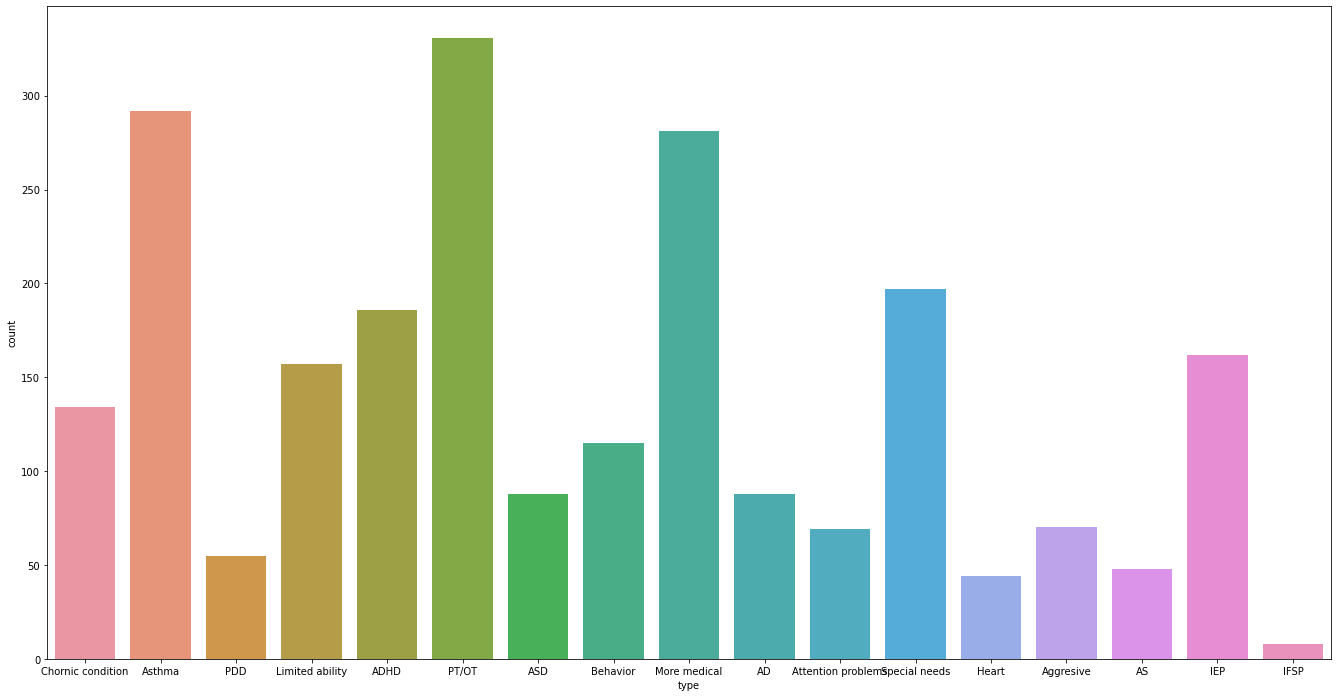

In [79]:
plt.figure(figsize=(23, 12))

sb.countplot(x = "type", data=df1);

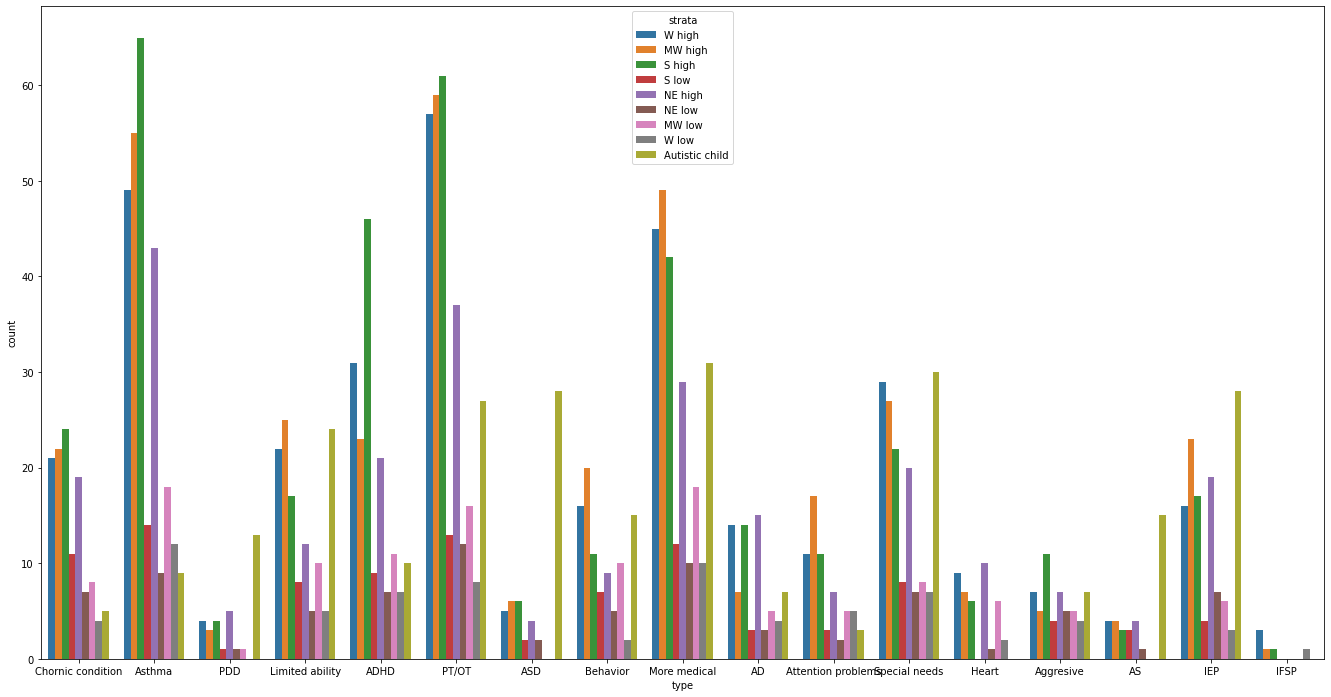

In [80]:
%matplotlib inline
plt.figure(figsize=(23, 12))
sb.countplot(x = "type",hue = "strata", data=df1);

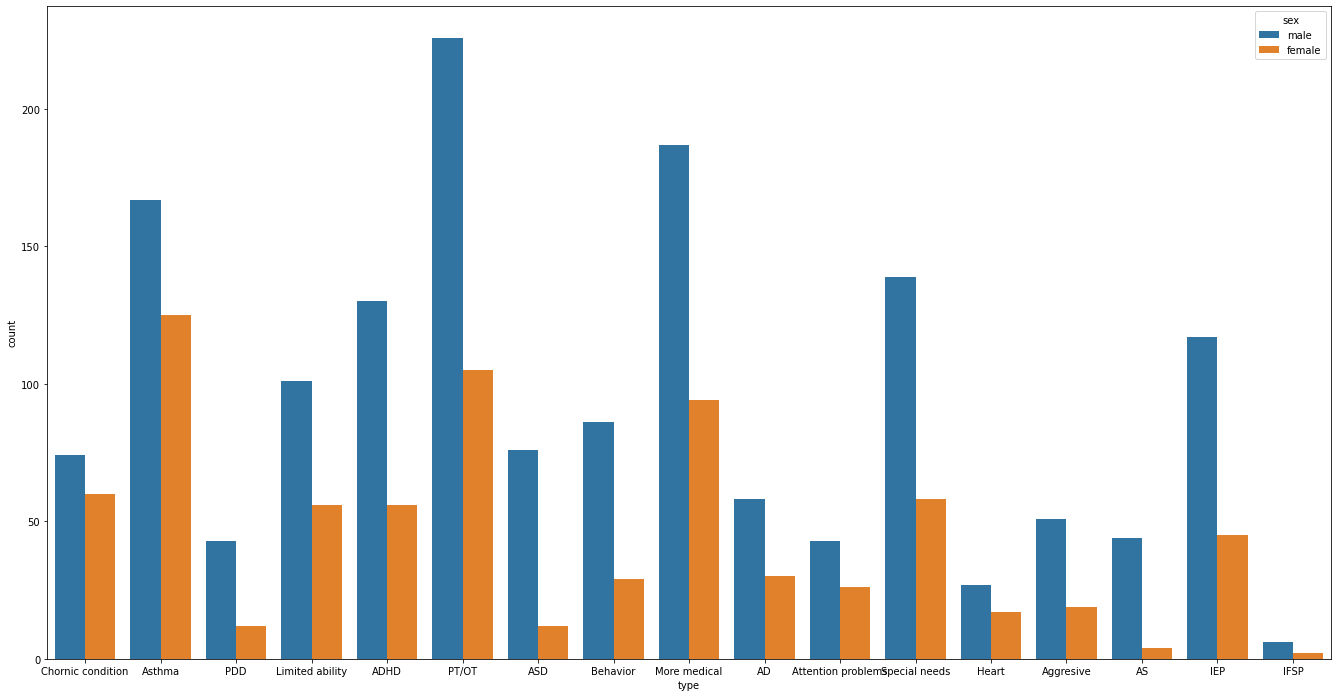

In [81]:
plt.figure(figsize=(23, 12))
sb.countplot(x = "type",hue = "sex", data=df1);

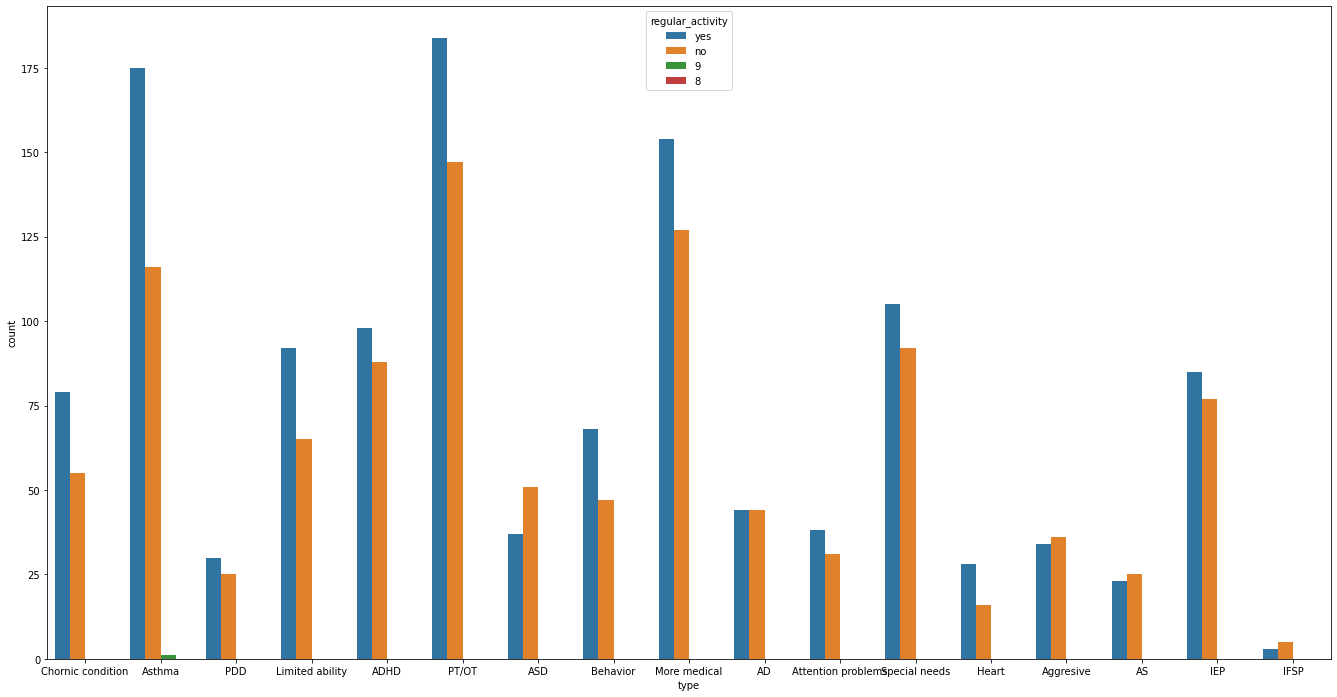

In [82]:
plt.figure(figsize=(23, 12))
sb.countplot(x = "type",hue = "regular_activity", data=df1);

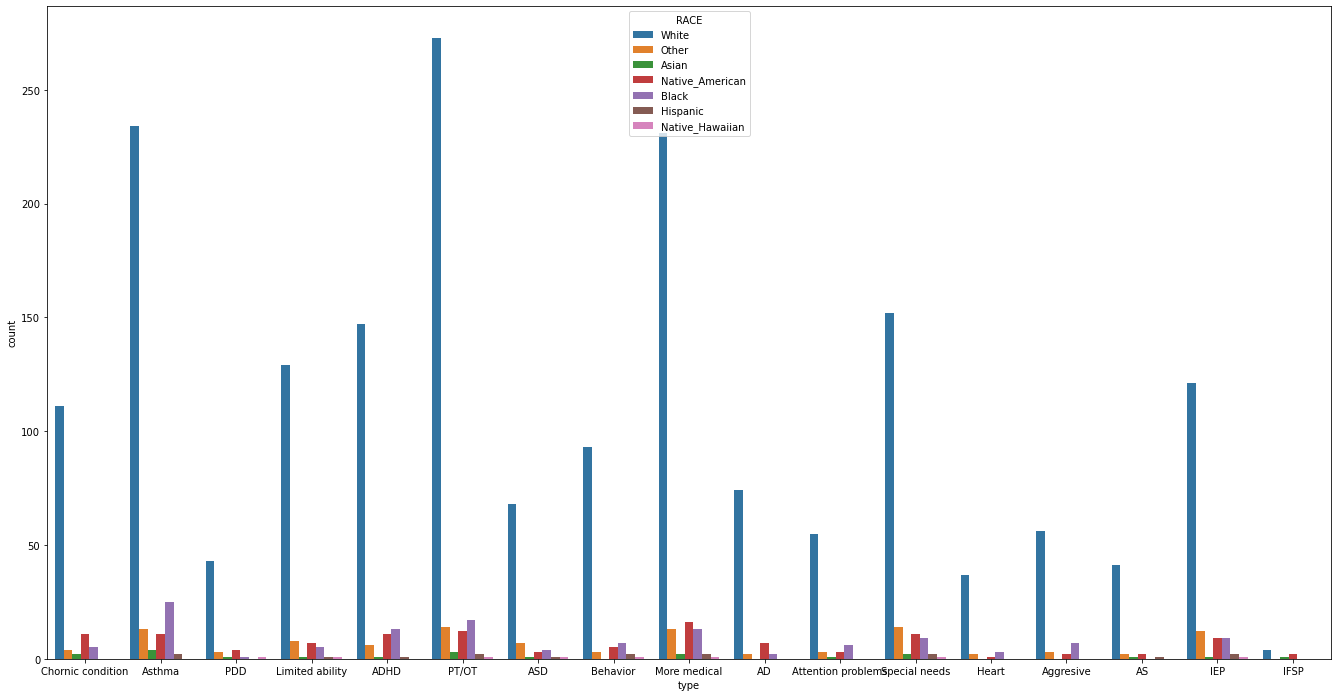

In [83]:
plt.figure(figsize=(23, 12))
sb.countplot(x = "type",hue = "RACE", data=df1);

In [89]:
df_race = df.drop_duplicates(['unique_id'])
df_race = df[["Hispanic", "White", "Black", "Asian", "Native_American", "Native_Hawaiian", "Other"]]
df_race.count(axis = 1)


0        1
1        1
2        1
3        1
4        1
        ..
11352    1
11353    1
11354    1
11355    1
11356    1
Length: 11357, dtype: int64

In [85]:
# data_more_1kid_ADHD = data_more_1kid_all[['unique_id','numkids','q601a01','q601a02','q601a03','q601a04','q601a05','q601a06']]
# data_more_1kid_ADHD = data_more_1kid_ADHD.replace(np.nan, 0)


# data_more_1kid_ADHD['has_problem'] = data_more_1kid_ADHD['q601a01']

# n = 1
# for col in ['q601a01','q601a02','q601a03','q601a04','q601a05','q601a06']:
#     data_more_1kid_ADHD[col] = pd.to_numeric(data_more_1kid_ADHD[col])
#     data_more_1kid_ADHD.loc[data_more_1kid_ADHD[col] > 0.0, 'has_problem'] = n
#     n+=1
    
# data_more_1kid_ADHD.loc[data_more_1kid_ADHD['q601a01'] == 7, 'has_problem'] = data_more_1kid_ADHD['numkids']



In [86]:
# data_more_1kid_ADHD_ = data_more_1kid_ADHD[['q601a01','q601a02','q601a03','q601a04','q601a05','q601a06']]
# col_count = data_more_1kid_ADHD_.count(axis = 1)
# data_more_1kid_ADHD['total_count'] = col_count

# data_more_1kid_ADHD.loc[data_more_1kid_ADHD['q601a01'] == 7, 'total_count'] = data_more_1kid_ADHD['numkids']
# data['ADHD_count'] = data_more_1kid_ADHD['total_count']


In [87]:
# data['has_problem'] = data['q601a01']

# n = 1
# for col in ['q601a01','q601a02','q601a03','q601a04','q601a05','q601a06']:
#     data[col] = pd.to_numeric(data[col])
#     data.loc[data[col] > 0.0, 'has_problem'] = n
#     n+=1
    
# data.loc[data['q601a01'] == 7, 'has_problem'] = data['numkids']
# data_more_1kid_ADHD0 = data[data['has_problem'] == 0]
# data_more_1kid_ADHD1 = data.reindex(data.index.repeat(data.has_problem))
# data_more_1kid_ADHD1['has_problem'] = 1
# data = pd.concat([data_more_1kid_ADHD0, data_more_1kid_ADHD1])
# data = data.sort_index()
# data['type'] = np.nan
# data.loc[data['has_problem'] == 1, 'type'] = 'ADHD'


# data['ADHD'] = 0

# for col in ['q601a01','q601a02','q601a03','q601a04','q601a05','q601a06']:
#     for n in range(data.shape[0]):
#         if list(data.loc[n, [col]])[0] > 0:
#             data.loc[n, ['ADHD']] = int(list(data.loc[n, [col]])[0])
        
# data.drop(['q601a01','q601a02','q601a03','q601a04','q601a05','q601a06'], axis=1, inplace=True)

# data